In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [258]:
#import datasets
app=pd.read_csv("application_record.csv")
record=pd.read_csv("credit_record.csv")

In [259]:
#import datasets
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [260]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [261]:
#this shows how many joined observations we should see in our models
len(set(record['ID']).intersection(set(app['ID'])))

36457

In [262]:
#drop all duplicates in "ID" and keep the last record to maeke sure it's most updated
app = app.drop_duplicates('ID', keep='last') 

In [263]:
num_missing=app.isna().sum()
columns={"column": app.columns.values, "number_missing": num_missing}
missing=pd.DataFrame(data=columns)
#after analysis, we saw that this column variable had too many missing values to be useful in our models. therefore it was dropped early.
#app = app.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [264]:
num_missing

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134187
CNT_FAM_MEMBERS             0
dtype: int64

<AxesSubplot:>

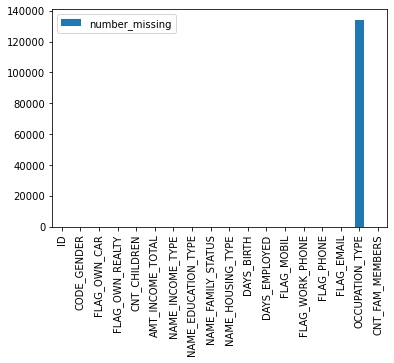

In [265]:
import matplotlib.pyplot as plt

#missing=pd.DataFrame(missing)
missing.plot.bar()

In [266]:
#use label encoder to change all categorical values to numerical for further model analysis
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in app:
    if app[x].dtypes=='object':
        app[x] = le.fit_transform(app[x])

In [267]:
app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,18,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,18,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,18,1.0


In [268]:
#replace all inputs that are good = 0, bad = 1 for our feature variable
record['STATUS'].replace({'C': 1, 'X' : 1, '1': 1, '2':1, '3':0, '4':0, '5':0}, inplace=True)
record['STATUS'] = record['STATUS'].astype('int')

In [269]:
recordgb = record.groupby('ID').agg(max).reset_index()
recordgb.head() 

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,1
1,5001712,0,1
2,5001713,0,1
3,5001714,0,1
4,5001715,0,1


In [270]:
#using an inner join to include "STATUS"
df = app.join(recordgb.set_index('ID'), on='ID', how='inner')
df.drop(['MONTHS_BALANCE'], axis=1, inplace=True)
df.head()
print(df.shape)

(36457, 19)


<AxesSubplot:>

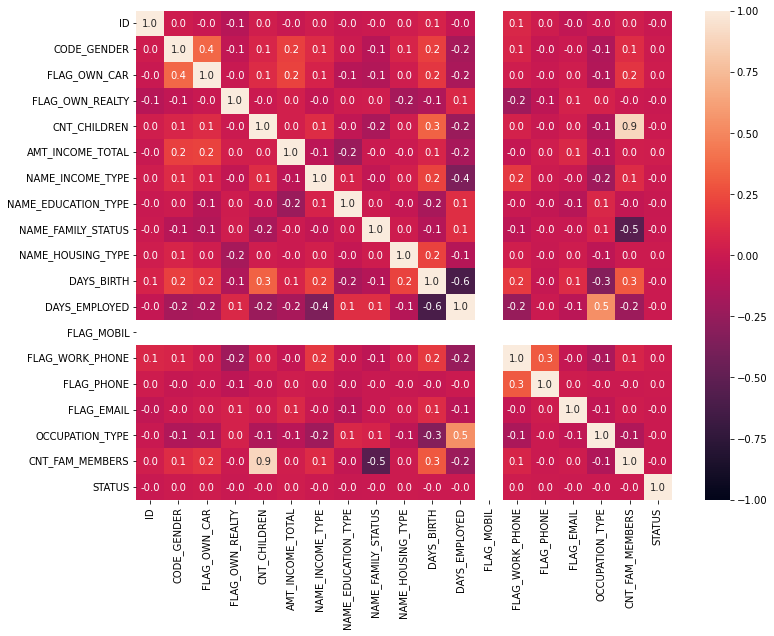

In [271]:
#check Pearson's correlations between all variables except "ID"
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot = True, fmt=".1f", vmin=-1, vmax=1)

In [272]:
#remove "FLAG_MOBIL" since it's not correlated to any variable as all observations = 1
#REMOVE OCCUPATION TYPE AS IT IS NOT USEFUL IN OUR MODELS. THERE ARE TOO MANY MISSING VALUES
df=df.drop(columns=["FLAG_MOBIL", "ID", "OCCUPATION_TYPE"])

In [273]:
#df.head(10)

In [274]:
#set target variable and predicting variables
X=df.loc[:, ~df.columns.isin(["STATUS"])]
y=df["STATUS"]
#X.head()
#y.head()

In [275]:
#split the data into 30% testing data and 70% training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.30, random_state = 100)

In [276]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
7473,1,0,1,0,157500.0,4,4,1,1,-9582,-3003,0,0,1,2.0
43486,0,0,1,0,112500.0,4,4,1,1,-23360,-469,0,0,0,2.0
36399,1,0,1,0,90000.0,4,4,1,1,-13648,-5840,0,0,0,2.0
24720,0,1,1,2,135000.0,4,4,1,1,-13375,-1346,0,0,0,4.0
46050,1,0,1,0,108000.0,4,4,1,1,-15997,-7341,1,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22585,1,1,0,0,119250.0,4,4,0,1,-17542,-645,0,0,1,2.0
22114,0,0,0,0,121500.0,4,4,2,1,-16471,-2745,0,1,0,1.0
86,0,0,1,0,297000.0,0,4,3,4,-15519,-3234,0,0,0,1.0
17413,0,1,0,1,180000.0,0,1,0,5,-9704,-592,0,0,0,3.0


In [277]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [278]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 15)
  
X_train = pca.fit_transform(X_train)

[[ 0.79471414 -0.51236203  0.79501248 -1.58012279  0.68807004 -1.52242031
  -2.94229786  0.08622132 -0.36754416  0.27569695 -0.43740981  1.31055358
  -0.61582053  0.75482272 -0.11058509]
 [-1.32453697  0.8559224  -0.71588509 -0.8137411  -0.38740661 -1.1208929
  -0.09735729 -0.91129194  0.44163305  0.42018     0.64035419 -0.04135292
   0.23812552 -1.18226991 -0.05928044]
 [ 0.10850077  0.01705381 -0.22005834 -1.37608128 -1.11528432 -1.08273346
  -0.3036578  -0.44448751  0.36986692  0.06011415 -0.57520093  1.2372139
  -0.79531962  0.04570486 -0.08990373]]


<AxesSubplot:>

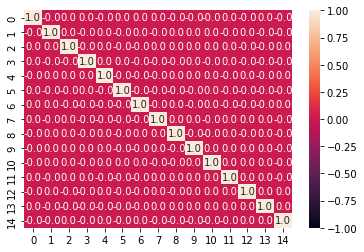

In [279]:
#What does my data look like now?
print(X_train[0:3,:])

sns.heatmap(pd.DataFrame(X_train).corr(), annot = True, fmt=".1f", vmin=-1, vmax=1)

In [280]:
#check percentage of data explained
explained_variance = pca.explained_variance_ratio_
explained_variance 

array([0.18789628, 0.10981524, 0.10038723, 0.08258189, 0.07871416,
       0.07318853, 0.06185885, 0.05551558, 0.0522007 , 0.04884248,
       0.04619897, 0.04085182, 0.03888686, 0.02162003, 0.00144137])

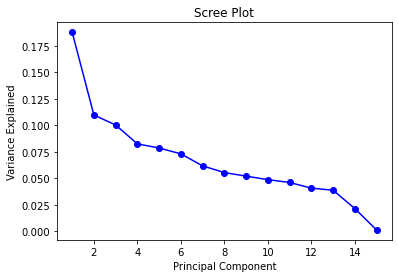

In [281]:
#Creating a Scree plot to see the variance explained
pc_q = np.arange(pca.n_components_) +1

plt.plot(pc_q, explained_variance, "o-", color = "blue")
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [282]:
# Cumulative Variance plot
import plotly.express as px

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [283]:
#First create a loadings table
#The loadings shows how much each of our original features have contributed to each PC.

loadings = pca.components_.T[:,[0,1]] * np.sqrt(pca.explained_variance_[[0,1]])
components=df.columns.tolist()
components=components[0:15]
loadingdf=pd.DataFrame(loadings,columns=('PC1','PC2'))
loadingdf["variable"]=components
loadingdf

,PC1,PC2,variable
0,0.372112,-0.214943,CODE_GENDER
1,0.370942,-0.127543,FLAG_OWN_CAR
2,-0.160530,0.348280,FLAG_OWN_REALTY
3,0.695224,0.512508,CNT_CHILDREN
4,0.197519,-0.202408,AMT_INCOME_TOTAL
5,0.356943,-0.238633,NAME_INCOME_TYPE
6,-0.189649,0.204007,NAME_EDUCATION_TYPE
7,-0.435126,-0.389152,NAME_FAMILY_STATUS
8,0.176714,-0.294710,NAME_HOUSING_TYPE
9,0.704807,-0.280343,DAYS_BIRTH


In [284]:
from sklearn.linear_model import LinearRegression
mlr= LinearRegression()  

mlr.fit(X, y) 

LinearRegression()

In [285]:
#apply backward elimination to selection features
from sklearn.feature_selection import RFE

#Define RFE 
rfe = RFE(mlr, n_features_to_select=4, step=1)

#Use RFE to select the top 4 features 
fit = rfe.fit(X, y)

#Create a dataframe for the results 
data_RFE_results = []
for i in range(X.shape[1]):
    data_RFE_results.append(
        {      
            'Feature_names': df.columns[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

data_RFE_results = pd.DataFrame(data_RFE_results)
data_RFE_results.index.name='Columns'
data_RFE_results.sort_values(by=["RFE_ranking"])

,Feature_names,Selected,RFE_ranking
Columns,,,
1,FLAG_OWN_CAR,True,1
3,CNT_CHILDREN,True,1
7,NAME_FAMILY_STATUS,True,1
14,CNT_FAM_MEMBERS,True,1
11,FLAG_WORK_PHONE,False,2
2,FLAG_OWN_REALTY,False,3
6,NAME_EDUCATION_TYPE,False,4
13,FLAG_EMAIL,False,5
12,FLAG_PHONE,False,6


In [286]:
#remove all unselected variables
reduced_X=df[["FLAG_OWN_CAR", "CNT_CHILDREN", "NAME_FAMILY_STATUS", "CNT_FAM_MEMBERS"]]
reduced_X.head()

reduced_X_train, reduced_X_test, y_train, y_test= train_test_split(reduced_X, y, test_size = 0.30, random_state = 100)

In [287]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

reduced_X_train = sc.fit_transform(reduced_X_train)
reduced_X_test = sc.transform(reduced_X_test)

In [288]:
#creating and training the knn model with the full X
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [289]:
#Predicting using test data
y_pred_knn = classifier.predict(X_test)

In [290]:
#Using a confusion matrix to evaluate
from sklearn.metrics import confusion_matrix,accuracy_score
cm_knn = confusion_matrix(y_test, y_pred_knn)
ac_knn = accuracy_score(y_test,y_pred_knn)

print(cm_knn)
print(ac_knn)

[[  42 1267]
 [ 317 9312]]
0.8551837630279758


In [291]:
#Calculating Precision

TP1 = cm_knn[0,0]
TN1 = cm_knn[1,1]
FP1 = cm_knn[0,1]
FN1 = cm_knn[1,0]

PCC_knn=(TP1+TN1)/(TP1+TN1+FP1+FN1)
errorRate_knn=1-PCC_knn
precision_knn = TP1/float(TP1+FP1)
sensitivity_knn=TP1/float(FN1+TP1)
specificity_knn=TN1/float(TN1+FP1)

print('PCC : {0:0.4f}'.format(PCC_knn))
print('Error Rate : {0:0.4f}'.format(errorRate_knn))
print('Precision : {0:0.4f}'.format(precision_knn))
print('Sensitivity : {0:0.4f}'.format(sensitivity_knn))
print('Specificity : {0:0.4f}'.format(specificity_knn))

PCC : 0.8552
Error Rate : 0.1448
Precision : 0.0321
Sensitivity : 0.1170
Specificity : 0.8802


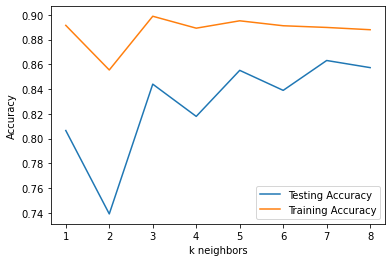

In [292]:
#How do we know if this is good enough?? 
#Run the model again for different k and plot the results 

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
  
plt.legend()
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')
plt.show()

In [293]:
#creating and training the knn model with the reduced X

classifier_reduced = KNeighborsClassifier(n_neighbors = 5)
classifier_reduced.fit(reduced_X_train, y_train)

KNeighborsClassifier()

In [294]:
#Predicting using reduced testing data
y_pred_knn_reduced = classifier_reduced.predict(reduced_X_test)

In [295]:
#Using a confusion matrix to evaluatethe reduced model

cm_knn_reduced = confusion_matrix(y_test, y_pred_knn_reduced)
ac_knn_reduced = accuracy_score(y_test,y_pred_knn_reduced)

print(cm_knn_reduced)
print(ac_knn_reduced)

[[ 372  937]
 [2557 7072]]
0.6805631742548912


[Text(0.501280737704918, 0.9545454545454546, 'CNT_CHILDREN <= 0.5\ngini = 0.208\nsamples = 36457\nvalue = [4299, 32158]'),
 Text(0.21413934426229508, 0.8636363636363636, 'FLAG_OWN_CAR <= 14.5\ngini = 0.214\nsamples = 22614\nvalue = [2753, 19861]'),
 Text(0.19774590163934427, 0.7727272727272727, 'CNT_FAM_MEMBERS <= 0.5\ngini = 0.214\nsamples = 22613\nvalue = [2752, 19861]'),
 Text(0.04918032786885246, 0.6818181818181818, 'NAME_FAMILY_STATUS <= 2.5\ngini = 0.197\nsamples = 1960\nvalue = [217, 1743]'),
 Text(0.03278688524590164, 0.5909090909090909, 'NAME_FAMILY_STATUS <= 0.5\ngini = 0.196\nsamples = 1947\nvalue = [214, 1733]'),
 Text(0.01639344262295082, 0.5, 'gini = 0.207\nsamples = 1321\nvalue = [155, 1166]'),
 Text(0.04918032786885246, 0.5, 'FLAG_OWN_CAR <= 3.5\ngini = 0.171\nsamples = 626\nvalue = [59, 567]'),
 Text(0.03278688524590164, 0.4090909090909091, 'FLAG_OWN_CAR <= 2.0\ngini = 0.18\nsamples = 501\nvalue = [50, 451]'),
 Text(0.01639344262295082, 0.3181818181818182, 'gini = 0.0\

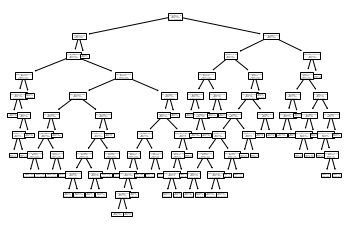

In [300]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state = 100) 
dtree = dtree.fit(reduced_X, y)

tree.plot_tree(dtree, feature_names=['CNT_CHILDREN', 'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'FLAG_OWN_CAR'])  

In [301]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score


#X_train1, X_test1, y_train1, y_test1 = train_test_split(reduced_X, y, test_size=0.3, random_state=100)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


y_pred_dc = model.predict(X_test)

accuracy_dc = accuracy_score(y_test, y_pred_dc)
print('Accuracy:', accuracy_dc)

precision_dc = precision_score(y_test, y_pred_dc)
print('Precision:', precision_dc)


Accuracy: 0.6921740720424209
Precision: 0.8767749699157641


In [302]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets on full X
clf.fit(X_train,y_train)

y_pred_rf=clf.predict(X_test)

In [303]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

precision_rf = precision_score(y_test, y_pred_rf)
print('Precision:', precision_rf)

Accuracy: 0.880325470835619
Precision: 0.880325470835619


In [304]:
#Create a Random Forest Classifier
clf_reduced=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets on reduced X
clf_reduced.fit(reduced_X_train,y_train)

y_pred_rf_reduced=clf_reduced.predict(reduced_X_test)

In [305]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_reduced))

precision_rf_reduced = precision_score(y_test, y_pred_rf_reduced)
print('Precision:', precision_rf_reduced)

Accuracy: 0.8802340464435912
Precision: 0.88045367236806
